# Keep-it-dry! LogisticRegression
Dataset: ki_ro_ros.csv with PCA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

from pprint import pprint

## Dataset Selection

In [2]:
datasets_dict = {}

datasets_dict['ii_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_adasyn.csv', index_col=0)
datasets_dict['ii_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_ros.csv', index_col=0)
datasets_dict['ii_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_rus.csv', index_col=0)
datasets_dict['ii_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smote.csv', index_col=0)
datasets_dict['ii_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smotenc_1.csv', index_col=0)

datasets_dict['ii_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_adasyn.csv', index_col=0)
datasets_dict['ii_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_ros.csv', index_col=0)
datasets_dict['ii_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_rus.csv', index_col=0)
datasets_dict['ii_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smote.csv', index_col=0)
datasets_dict['ii_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smotenc_1.csv', index_col=0)

datasets_dict['ii_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_adasyn.csv', index_col=0)
datasets_dict['ii_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_ros.csv', index_col=0)
datasets_dict['ii_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_rus.csv', index_col=0)
datasets_dict['ii_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smote.csv', index_col=0)
datasets_dict['ii_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smotenc_1.csv', index_col=0)

datasets_dict['ki_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_adasyn.csv', index_col=0)
datasets_dict['ki_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_ros.csv', index_col=0)
datasets_dict['ki_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_rus.csv', index_col=0)
datasets_dict['ki_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smote.csv', index_col=0)
datasets_dict['ki_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smotenc_1.csv', index_col=0)

datasets_dict['ki_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_adasyn.csv', index_col=0)
datasets_dict['ki_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
datasets_dict['ki_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_rus.csv', index_col=0)
datasets_dict['ki_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smote.csv', index_col=0)
datasets_dict['ki_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smotenc_1.csv', index_col=0)

datasets_dict['ki_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_adasyn.csv', index_col=0)
datasets_dict['ki_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_ros.csv', index_col=0)
datasets_dict['ki_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_rus.csv', index_col=0)
datasets_dict['ki_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smote.csv', index_col=0)
datasets_dict['ki_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smotenc_1.csv', index_col=0)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

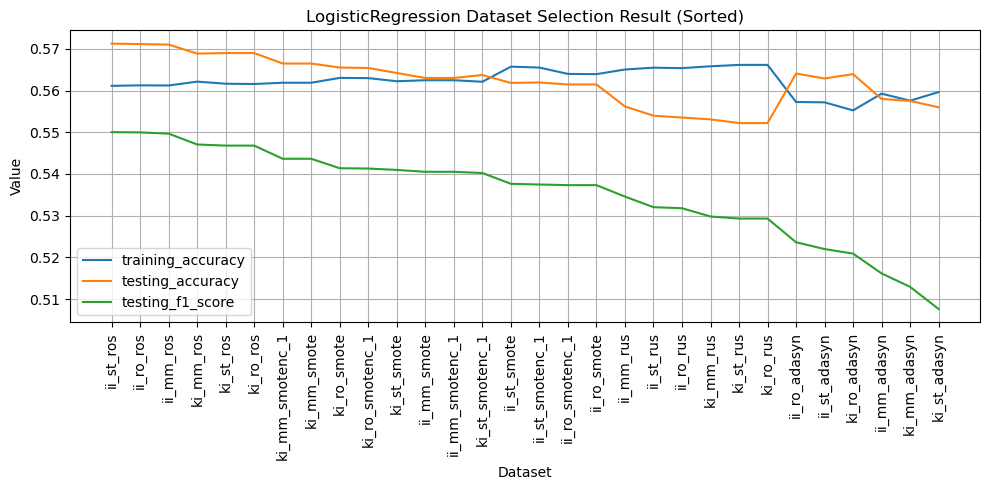

In [4]:
dataset_result = {}
dataset_result['dataset'] = []
dataset_result['training_accuracy'] = []
dataset_result['testing_accuracy'] = []
dataset_result['testing_f1_score'] = []

for title, data in datasets_dict.items():

    X_df = data.copy()
    y_df = X_df.pop('failure')
    object_cols = X_df.select_dtypes(include=['object']).columns
    X_df = X_df.drop(object_cols, axis=1)

    X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=.2, stratify=y_df, random_state=42)
    
    lr_dataset = LogisticRegression(max_iter=1000)
    lr_dataset.fit(X_train, y_train)
    
    y_predict = lr_dataset.predict(X_val)

    dataset_result['dataset'].append(title)
    dataset_result['training_accuracy'].append(lr_dataset.score(X_train, y_train))
    dataset_result['testing_accuracy'].append(lr_dataset.score(X_val, y_val))
    dataset_result['testing_f1_score'].append(f1_score(y_val, y_predict))

df_result = pd.DataFrame(dataset_result)
df_result_sorted = df_result.sort_values(by='testing_f1_score', ascending=False)

plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result_sorted, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("LogisticRegression Dataset Selection Result (Sorted)")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

## Data Read

In [65]:
df_train = pd.read_csv('./../Preprocessing/kid_train_ii_ro_ros.csv', index_col=0)
df_test = pd.read_csv('./../Preprocessing/kid_test_ii_ro.csv', index_col=0)

In [66]:
df_train.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,-0.879646,7.0,8.0,9,5,0.000000,0.000000,-0.50,0.186081,0.584077,...,-0.579673,-0.154503,-0.824380,1.834654,-0.414278,-0.319912,-1.010927,-0.793236,0.384251,0.0
1,-0.781142,7.0,8.0,9,5,1.166667,-0.833333,-0.75,0.315282,-0.143601,...,0.770897,1.051737,-0.658574,0.018489,-0.629651,-0.338426,-0.311094,-0.366421,-0.119937,0.0
2,-0.831731,7.0,8.0,9,5,0.833333,-1.166667,-0.25,0.198777,-0.060268,...,0.973939,-0.300083,0.505621,1.097728,0.805447,1.353395,-0.465870,0.676955,-0.234739,0.0
3,-0.448409,7.0,8.0,9,5,1.000000,-1.000000,0.00,-0.370304,-0.405506,...,0.788388,0.126838,-0.419938,-0.898045,-0.254016,-0.266130,0.593392,0.328111,0.766384,0.0
4,1.340497,7.0,8.0,9,5,0.333333,-1.000000,0.50,1.161436,0.905506,...,-0.834426,0.552025,0.383264,0.374010,0.421836,-1.744758,-0.949736,-0.014422,-0.747825,0.0


In [67]:
df_test_id = df_test[['id']]
df_test.drop(columns=['id', 'product_code', 'product_code_F', 'product_code_G', 'product_code_H', 'product_code_I'], inplace=True)
df_test.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-0.067966,5.0,6.0,6,4,-0.166667,0.166667,0.0,1.130816,-1.156994,...,-0.269451,-0.480814,-0.125618,-0.578512,1.083994,-1.407751,0.400361,-0.646870,0.570589,-0.411505
1,-0.192586,5.0,6.0,6,4,0.666667,0.000000,-1.5,0.068830,0.144345,...,0.257875,0.454548,-1.229604,-0.649495,0.397781,1.354395,0.338619,-0.115182,-1.055545,-1.011143
2,-0.220349,5.0,6.0,6,4,0.166667,0.666667,-0.5,0.510951,-0.931548,...,-0.919377,0.234776,0.531228,-0.570248,-0.429477,-1.622399,-0.173782,1.061833,-0.190647,-0.261662
3,-0.208832,5.0,6.0,6,4,0.166667,0.500000,1.0,-0.950588,-0.628720,...,-0.052317,0.270517,1.177675,-1.563533,-0.415742,-0.072001,-0.210721,-1.223808,-0.150084,-0.659233
4,1.750553,5.0,6.0,6,4,1.166667,1.333333,0.5,0.012818,0.714286,...,0.090224,0.711582,-0.894537,-0.692665,0.116746,0.340617,0.061574,-0.861807,0.318196,0.611286


In [68]:
X_df = df_train[df_train.columns[:-1]]
y_df = df_train[df_train.columns[-1]]

## PCA

In [69]:
n_components_range = range(10, 23)  # Explore components from 10 to 22

best_n_components = None
best_score = -np.inf  # Initialize with a negative infinity

for n_components in n_components_range:
  # Apply PCA with current n_components
  pca = PCA(n_components=n_components)
  pca_data = pca.fit_transform(X_df)

  # Train LogisticRegression on transformed data
  model = LogisticRegression()
  model.fit(pca_data, y_df)

  # Evaluate performance on testing set (e.g., using F1 score)
  score = model.score(pca.transform(X_df), y_df)
  print(f"{n_components} components score: {score}")

  # Update best component and score if performance improves
  if score > best_score:
    best_n_components = n_components
    best_score = score

print("Best number of components based on LogisticRegression performance:", best_n_components)

10 components score: 0.563261794369294
11 components score: 0.56357248697481
12 components score: 0.5653649443143253
13 components score: 0.5637636824243583
14 components score: 0.5635007886812294
15 components score: 0.5649825534152287
16 components score: 0.565173748864777
17 components score: 0.5658429329381961
18 components score: 0.5672529993786148
19 components score: 0.5673246976721954
20 components score: 0.565484441470293
21 components score: 0.5665360164428087
22 components score: 0.5643372687730032
Best number of components based on LogisticRegression performance: 19


In [70]:
pca = PCA(n_components=19)
X_df_pca = pca.fit_transform(X_df)
df_test_pca = pca.transform(df_test)

## Hyperparameter Tuning using GridSearchCV

In [71]:
X_train, X_val, y_train, y_val = train_test_split(X_df_pca, y_df, test_size=.75, random_state=42, stratify=y_df)

In [72]:
# Define model
model = LogisticRegression(max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty': ['l2', 'elasticnet'],
    'C': np.logspace(-2, 2, 10)  # Search across different C values in log space
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')  # Use F1 score for imbalanced data

In [73]:
# GridSearchCV fitting
grid_search.fit(X_train, y_train)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\RAYHAN EGAR\anaconda3\Lib\site-package

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1')

In [74]:
logreg_best = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best f1-score: {grid_search.best_score_}")

Best parameters: {'C': 0.5994842503189409, 'penalty': 'l2', 'solver': 'saga'}
Best f1-score: 0.5397899328354491


## Prediction

In [75]:
y_pred = logreg_best.predict(df_test_pca)
y_pred_df = pd.DataFrame(y_pred, columns=['failure'])

In [76]:
y_submission = pd.concat([df_test_id, y_pred_df], axis=1)

In [77]:
y_submission.head()

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,1.0


In [78]:
y_submission.to_csv('./../Submission/kid_submission_logreg_latesub_v4.csv', index=False)